In [25]:
!yt-dlp --flat-playlist -J "https://www.youtube.com/playlist?list=PLH15HpR5qRsVY4gZPQrkdVBeR_BwNujGe" > playlist4.json




In [26]:
import json

# Load the playlist JSON
with open("playlist4.json", "r") as file:
    playlist_data = json.load(file)

# Extract video URLs
video_ids = [entry['id'] for entry in playlist_data['entries']]
video_urls = [f"https://www.youtube.com/watch?v={video_id}" for video_id in video_ids]

# Save URLs to a text file
with open("video_urls4.txt", "w") as outfile:
    for url in video_urls:
        outfile.write(url + "\n")

print(f"Extracted {len(video_urls)} video URLs.")


Extracted 45 video URLs.


In [27]:
from youtube_transcript_api import YouTubeTranscriptApi

# Load video URLs
with open("video_urls4.txt", "r") as file:
    video_urls = [line.strip() for line in file]

# Extract video IDs
video_ids = [url.split("v=")[-1] for url in video_urls]

transcripts = {}

# Fetch transcripts for each video
for video_id in video_ids:
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        transcripts[video_id] = transcript
        print(f"Transcript fetched for video: {video_id}")
    except Exception as e:
        print(f"Failed to fetch transcript for {video_id}: {e}")

# Save all transcripts
with open("blackhat_transcripts4.json", "w") as outfile:
    import json
    json.dump(transcripts, outfile, indent=4)

print("Transcripts saved to blackhat_transcripts.json")


Transcript fetched for video: V_HwRtUk5tI
Transcript fetched for video: qIzMKfOmIAA
Transcript fetched for video: Dxqb-q2OjoM
Failed to fetch transcript for 4yBKYMKRPbU: 
Could not retrieve a transcript for the video https://www.youtube.com/watch?v=4yBKYMKRPbU! This is most likely caused by:

No transcripts were found for any of the requested language codes: ('en',)

For this video (4yBKYMKRPbU) transcripts are available in the following languages:

(MANUALLY CREATED)
None

(GENERATED)
 - ru ("Russian (auto-generated)")[TRANSLATABLE]

(TRANSLATION LANGUAGES)
 - ab ("Abkhazian")
 - aa ("Afar")
 - af ("Afrikaans")
 - ak ("Akan")
 - sq ("Albanian")
 - am ("Amharic")
 - ar ("Arabic")
 - hy ("Armenian")
 - as ("Assamese")
 - ay ("Aymara")
 - az ("Azerbaijani")
 - bn ("Bangla")
 - ba ("Bashkir")
 - eu ("Basque")
 - be ("Belarusian")
 - bho ("Bhojpuri")
 - bs ("Bosnian")
 - br ("Breton")
 - bg ("Bulgarian")
 - my ("Burmese")
 - ca ("Catalan")
 - ceb ("Cebuano")
 - zh-Hans ("Chinese (Simplifie

In [4]:
from youtube_transcript_api import YouTubeTranscriptApi

video_id = "xngNFBW0tu4&list=PLH15HpR5qRsWalnnt-9eYELxbEcYBPB6I&index=3"  # Extract from the YouTube URL
try:
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    for entry in transcript:
        print(f"{entry['start']} --> {entry['text']}")
except Exception as e:
    print("Error:", e)


1.079 --> so thank you everybody for joining to
3.48 --> this presentation we're going to show
5.12 --> you today how we mix three different and
7.64 --> independent research projects into one
9.8 --> exploitation chain that will ultimately
11.639 --> allow an attacker without authentication
13.96 --> to root an Enterprise an SCP system so
16.68 --> hope you enjoy it because you are here
18.96 --> for our content and not for us we are
20.76 --> going to do this part super brief my
22.16 --> name is Pao artuso I'm from Argentina
23.92 --> I've been working at an ABS for the last
25.48 --> 10 years as security researcher and the
28.08 --> most important thing that I would like
29.32 --> you to know from me is that when I
31.08 --> started this research my Java skills
33.079 --> were null and yet today still
37.16 --> null few
42.76 --> number few number of me so I work onp
46.36 --> since 20 years now and the last 10 years
48.6 --> on onp security and the last six years I
52.079 --> work

In [6]:
from youtube_transcript_api import YouTubeTranscriptApi

video_ids = [
    "xngNFBW0tu4&list=PLH15HpR5qRsWalnnt-9eYELxbEcYBPB6I&index=3"
]

transcripts = {}
for video_id in video_ids:
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        transcripts[video_id] = transcript
        print(f"Transcript for {video_id} saved.")
    except Exception as e:
        print(f"Error fetching {video_id}: {e}")

# Save to file
with open("transcripts.json", "w") as file:
    import json
    json.dump(transcripts, file, indent=4)


Transcript for xngNFBW0tu4&list=PLH15HpR5qRsWalnnt-9eYELxbEcYBPB6I&index=3 saved.


In [28]:
import json

def combine_transcript_lines(transcript, time_gap=1.5):
    """
    Combine transcript lines into paragraphs based on timing gaps.

    Args:
        transcript (list): List of transcript entries [{"start": float, "text": str}, ...].
        time_gap (float): Maximum allowable gap (in seconds) between lines to combine them.

    Returns:
        list: Combined paragraphs as strings.
    """
    paragraphs = []
    current_paragraph = []
    last_end_time = 0  # To track the end of the previous line

    for entry in transcript:
        start_time = entry['start']
        text = entry['text']

        # If gap is large, start a new paragraph
        if start_time - last_end_time > time_gap and current_paragraph:
            paragraphs.append(" ".join(current_paragraph))
            current_paragraph = []

        # Add current line to the paragraph
        current_paragraph.append(text)
        last_end_time = start_time + len(text.split()) * 0.3  # Approximate line duration

    # Append remaining paragraph
    if current_paragraph:
        paragraphs.append(" ".join(current_paragraph))

    return paragraphs

# Load transcript JSON (example format [{"start": 0.0, "text": "line1"}, ...])
with open("blackhat_transcripts4.json", "r") as file:
    transcripts = json.load(file)

# Process each video transcript
combined_transcripts = {}
for video_id, transcript in transcripts.items():
    paragraphs = combine_transcript_lines(transcript)
    combined_transcripts[video_id] = paragraphs

# Save combined paragraphs to a file
with open("blackhat_transcripts_4.json", "w") as outfile:
    json.dump(combined_transcripts, outfile, indent=4)

print("Paragraphs successfully combined and saved.")


Paragraphs successfully combined and saved.


In [34]:
import json

# Load the JSON files
with open("blackhat_transcripts_1.json", "r") as file:
    blackhat_transcripts_1 = json.load(file)
with open("blackhat_transcripts_2.json", "r") as file:
    blackhat_transcripts_2 = json.load(file)
with open("blackhat_transcripts_3.json", "r") as file:
    blackhat_transcripts_3 = json.load(file)
with open("blackhat_transcripts_4.json", "r") as file:
    blackhat_transcripts_4 = json.load(file)

# Merge dictionaries
concat = {}
concat.update(blackhat_transcripts_1)
concat.update(blackhat_transcripts_2)
concat.update(blackhat_transcripts_3)
concat.update(blackhat_transcripts_4)

# Save the merged dictionary to a new JSON file
with open("blackhat_transcripts.json", "w") as outfile:
    json.dump(concat, outfile, indent=4)

print("Transcripts successfully merged and saved to blackhat_transcripts.json")


Transcripts successfully merged and saved to blackhat_transcripts.json


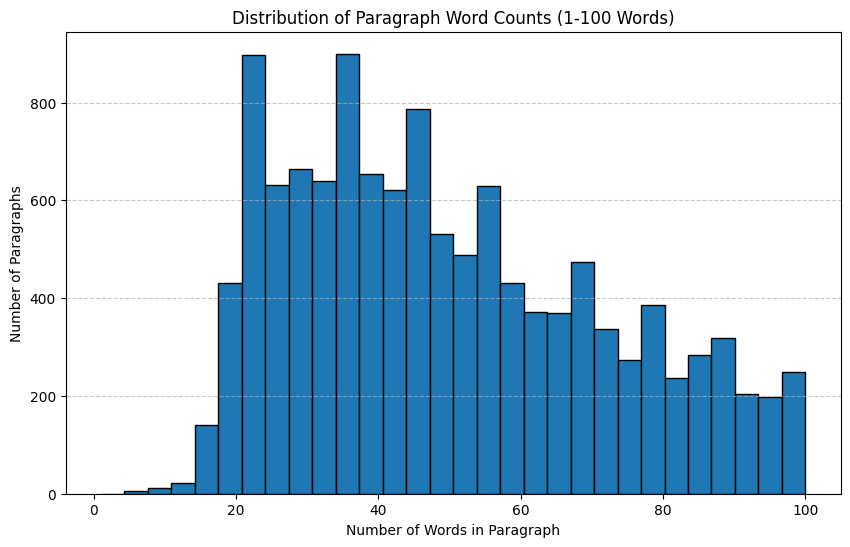

Total paragraphs (filtered): 12190
Max words in a paragraph: 100
Min words in a paragraph: 6
Filtered paragraphs saved to filtered_paragraphs.json


In [36]:
import re
import json
import matplotlib.pyplot as plt

def combine_paragraphs_and_filter(transcripts, min_length=40):
    """
    Combine related lines into paragraphs and filter out paragraphs with fewer than `min_length` characters.
    Args:
        transcripts (dict): Transcript data with video IDs as keys and lists of text lines as values.
        min_length (int): Minimum number of characters for a paragraph to be included.

    Returns:
        list: A list of combined and filtered paragraphs.
    """
    all_paragraphs = []

    for video_id, text_list in transcripts.items():
        current_paragraph = []
        for text in text_list:
            # Append line to the current paragraph
            current_paragraph.append(text.strip())

            # If a sentence ends or line is long, treat it as a break
            if text.strip().endswith(".") or len(text.strip()) > 100:
                combined_text = " ".join(current_paragraph).strip()
                if len(combined_text) >= min_length:  # Filter based on character length
                    all_paragraphs.append(combined_text)
                current_paragraph = []  # Start a new paragraph

        # Include any remaining text as a paragraph
        if current_paragraph:
            combined_text = " ".join(current_paragraph).strip()
            if len(combined_text) >= min_length:
                all_paragraphs.append(combined_text)

    return all_paragraphs

def plot_word_distribution(paragraphs, word_limit=100):
    """
    Plot a histogram showing the distribution of word counts in paragraphs, limited to a maximum word count.
    """
    word_counts = [len(re.findall(r'\w+', paragraph)) for paragraph in paragraphs]
    filtered_word_counts = [count for count in word_counts if 1 <= count <= word_limit]

    plt.figure(figsize=(10, 6))
    plt.hist(filtered_word_counts, bins=30, range=(1, word_limit), edgecolor='black')
    plt.title("Distribution of Paragraph Word Counts (1-100 Words)")
    plt.xlabel("Number of Words in Paragraph")
    plt.ylabel("Number of Paragraphs")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print(f"Total paragraphs (filtered): {len(filtered_word_counts)}")
    print(f"Max words in a paragraph: {max(filtered_word_counts)}")
    print(f"Min words in a paragraph: {min(filtered_word_counts)}")
    return filtered_word_counts

# Sample Transcript JSON (replace with your actual JSON file)
with open("blackhat_transcripts.json", "r") as file:
    transcripts = json.load(file)

# Process transcripts
filtered_paragraphs = combine_paragraphs_and_filter(transcripts, min_length=40)

# Plot the word count distribution (1 to 100 words)
word_counts = plot_word_distribution(filtered_paragraphs, word_limit=100)

# Save combined paragraphs to a file
with open("filtered_paragraphs.json", "w") as outfile:
    json.dump(filtered_paragraphs, outfile, indent=4)

print("Filtered paragraphs saved to filtered_paragraphs.json")
